In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv_list = []

for file in os.listdir("/home/frankmuci/code/frankmuci/venezuela_fx/venezuela_fx/data"):
    if file.endswith('.csv'):
        if file.startswith('historical_country'):
            csv_list.append(file)

In [3]:
csv_list_working = []

for file in csv_list:
    df = pd.read_csv(f'/home/frankmuci/code/frankmuci/venezuela_fx/venezuela_fx/data/{file}')
    frequency = df.at[0, 'Frequency']
    if frequency in ['Daily', 'Weekly', 'Monthly']:
        csv_list_working.append(file)

In [4]:
csv_list_working2 = []

for file in csv_list_working:
    df = pd.read_csv(f'/home/frankmuci/code/frankmuci/venezuela_fx/venezuela_fx/data/{file}')
    df['DateTime'] = df['DateTime'].apply(pd.to_datetime)
    first_date = df['DateTime'].min()
    last_date = df['DateTime'].max()
    
    if first_date.year <= 2008:
        if last_date.year >= 2021:
            csv_list_working2.append(file)

In [5]:
csv_list_daily, csv_list_weekly, csv_list_monthly = [], [], []

for file in csv_list_working2:
    df = pd.read_csv(f'/home/frankmuci/code/frankmuci/venezuela_fx/venezuela_fx/data/{file}')
    frequency = df.at[0, 'Frequency']
    if frequency in ['Daily']:
        csv_list_daily.append(file)
    
    if frequency in ['Monthly']:
        csv_list_monthly.append(file)

In [6]:
#DAILY MERGE
df_list = []

for file in csv_list_daily:
    df_temp = pd.read_csv(f'/home/frankmuci/code/frankmuci/venezuela_fx/venezuela_fx/data/{file}')
    df_temp = df_temp.drop(columns=['Country', 'Category', 'Frequency', 'HistoricalDataSymbol', 'LastUpdate'])
    newname = file.lstrip('historical_country_Venezuela_indicator_').rstrip('.csv')
    df_temp.rename(columns={'Value':newname}, inplace=True)
    df_list.append(df_temp)

for i in range(len(df_list)):
    if i == 0:
        df_daily = df_list[i]
    else:
        df_daily = pd.merge(df_daily, df_list[i], on='DateTime', how='outer')

In [7]:
#MONTHLY MERGE
df_list = []

for file in csv_list_monthly:
    df_temp = pd.read_csv(f'/home/frankmuci/code/frankmuci/venezuela_fx/venezuela_fx/data/{file}')
    df_temp = df_temp.drop(columns=['Country', 'Category', 'Frequency', 'HistoricalDataSymbol', 'LastUpdate'])
    newname = file.lstrip('historical_country_Venezuela_indicator_').rstrip('.csv')
    df_temp.rename(columns={'Value':newname}, inplace=True)
    df_list.append(df_temp)

df_list
for i in range(len(df_list)):
    if i == 0:
        df_monthly = df_list[i]
    else:
        df_monthly = pd.merge(df_monthly, df_list[i], on='DateTime', how='outer')

df_monthly.sort_values('DateTime', inplace=True)

In [8]:
df_merged = pd.merge(df_daily, df_monthly, on='DateTime', how='outer')
df_merged['DateTime'] = df_merged['DateTime'].apply(pd.to_datetime)
df_merged = df_merged[df_merged['DateTime'].dt.year >= 2000]


In [9]:
df_merged.columns

Index(['DateTime', 'Stock_Market', 'Deposit_Interest_Rate', 'Interest_Rate',
       'Money_Supply_M3', 'Central_Bank_Balance_Sheet', 'Crude_Oil_Production',
       'Crude_Oil_Rig', 'Money_Supply_M0', 'Foreign_Exchange_Reserve',
       'External_Debt', 'Inflation_Rate', 'Money_Supply_M2',
       'Inflation_Rate_Mom', 'Private_Sector_Credit',
       'Consumer_Price_Index_CPI', 'CPI_Transportation',
       'Foreign_Exchange_Reserves (1)', 'Money_Supply_M1',
       'Banks_Balance_Sheet'],
      dtype='object')

In [10]:
# Stock Market

df_merged.loc[df_merged['DateTime'] >= '2018-11-06', 'Stock_Market'] = df_merged.loc[df_merged['DateTime'] >= '2018-11-06', 'Stock_Market'] * 10**3
df_merged.loc[df_merged['DateTime'] >= '2021-03-16', 'Stock_Market'] = df_merged.loc[df_merged['DateTime'] >= '2021-03-16', 'Stock_Market'] * 10**3

df_merged.loc[df_merged['DateTime'] >= '2019-01-31', 'Banks_Balance_Sheet'] = df_merged.loc[df_merged['DateTime'] >= '2019-01-31', 'Banks_Balance_Sheet'] * 10**3

df_merged.loc[df_merged['DateTime'] >= '2021-09-30', 'Central_Bank_Balance_Sheet'] = df_merged.loc[df_merged['DateTime'] >= '2021-09-30', 'Central_Bank_Balance_Sheet'] * 10**6

df_merged.loc[df_merged['DateTime'] >= '2021-09-30', 'Money_Supply_M0'] = df_merged.loc[df_merged['DateTime'] >= '2021-09-30', 'Money_Supply_M0'] * 10**3
df_merged.loc[df_merged['DateTime'] >= '2021-08-31', 'Money_Supply_M0'] = df_merged.loc[df_merged['DateTime'] >= '2021-08-31', 'Money_Supply_M0'] * 10**6
df_merged.loc[df_merged['DateTime'] >= '2021-08-31', 'Money_Supply_M1'] = df_merged.loc[df_merged['DateTime'] >= '2021-08-31', 'Money_Supply_M1'] * 10**6
df_merged.loc[df_merged['DateTime'] >= '2021-08-31', 'Money_Supply_M2'] = df_merged.loc[df_merged['DateTime'] >= '2021-08-31', 'Money_Supply_M2'] * 10**6
df_merged.loc[df_merged['DateTime'] >= '2021-08-31', 'Money_Supply_M3'] = df_merged.loc[df_merged['DateTime'] >= '2021-08-31', 'Money_Supply_M3'] * 10**6

df_merged.loc[df_merged['DateTime'] >= '2019-01-31', 'Private_Sector_Credit'] = df_merged.loc[df_merged['DateTime'] >= '2019-01-31', 'Private_Sector_Credit'] * 10**2


In [11]:
df_merged.set_index('DateTime', inplace=True)
df = df.reindex(sorted(df.columns), axis=1)
df.sort_index(inplace=True)

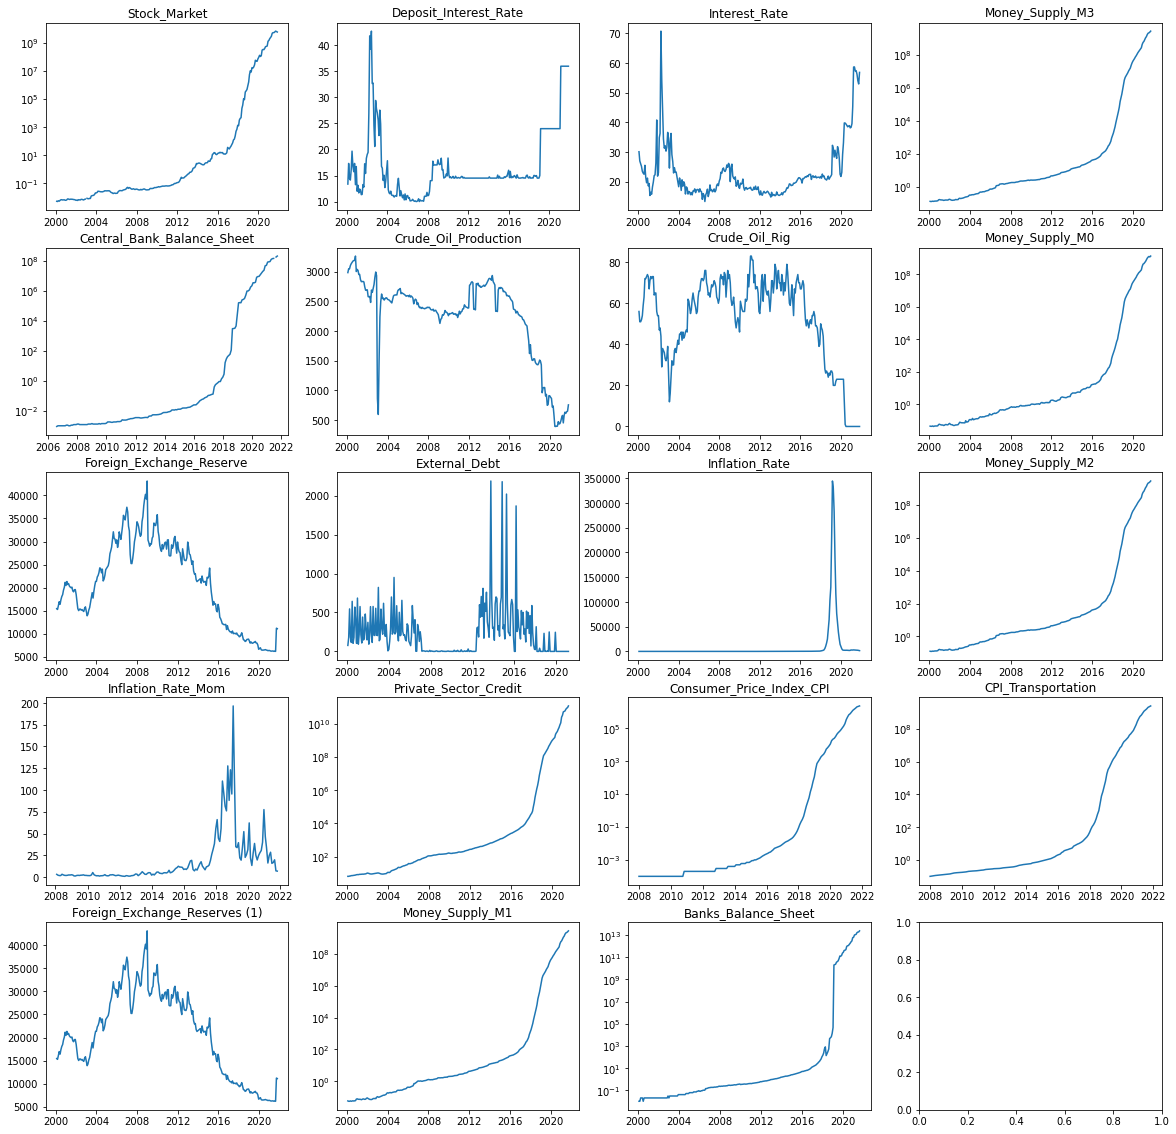

In [12]:
log_cols = ['Money_Supply_M0', 'Money_Supply_M1', 'Money_Supply_M2', 'Money_Supply_M3', 'Central_Bank_Balance_Sheet', 'Private_Sector_Credit', 'Consumer_Price_Index_CPI', 'CPI_Transportation', 'Banks_Balance_Sheet', 'Stock_Market']

fig, axs = plt.subplots(5,4, figsize=(20,20))
axs = axs.flatten()

for idx, col in enumerate(list(df_merged.columns)):
    axs[idx].plot(df_merged.resample('m').first()[col])
    axs[idx].set_title(col)
    
    if col in log_cols:
        axs[idx].set_yscale('log')

In [13]:
df_merged.to_csv('/home/frankmuci/code/frankmuci/venezuela_fx/venezuela_fx/data/merge_trading_economics.csv')